# Part II – Feedforward NNs, Autoencoders and Convolutional NNs

## PartII.1

Objective:

NN:
- 784->128->64->10
- input->hidden->hidden->10
- . -(Relu)-> . -ELU-> . -softmax-> .

Train: For 5 epochs.

(Part II.2: Autoencodeers and stuff)


Imports:

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) =mnist.load_data()
# Normalize the images to the range [0, 1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
# Convert the labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape

In [3]:
# Define input layer
inputs = Input(shape=(28, 28, 1))

# Flatten the input data
x = Flatten()(inputs)

# Define a dense layer
x = Dense(64, activation='relu')(x)
x = Dense(10, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(784, activation='relu')(x)

# Define output layer
outputs = x
outputs = Reshape((28, 28, 1))(outputs)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Display the model's architecture
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
 dense_2 (Dense)             (None, 64)                704       
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0    

Training


In [4]:
# Train the model
history = model.fit(train_images, train_images, epochs=6, batch_size=64, validation_split=0.2)

Epoch 1/6


750/750 [==============================] - 5s 4ms/step - loss: 0.0443 - accuracy: 0.8041 - val_loss: 0.0349 - val_accuracy: 0.8073
Epoch 2/6
750/750 [==============================] - 3s 4ms/step - loss: 0.0327 - accuracy: 0.8075 - val_loss: 0.0312 - val_accuracy: 0.8088
Epoch 3/6
750/750 [==============================] - 3s 4ms/step - loss: 0.0303 - accuracy: 0.8081 - val_loss: 0.0290 - val_accuracy: 0.8093
Epoch 4/6
750/750 [==============================] - 3s 4ms/step - loss: 0.0287 - accuracy: 0.8085 - val_loss: 0.0284 - val_accuracy: 0.8095
Epoch 5/6
750/750 [==============================] - 3s 4ms/step - loss: 0.0281 - accuracy: 0.8087 - val_loss: 0.0278 - val_accuracy: 0.8096
Epoch 6/6
750/750 [==============================] - 3s 4ms/step - loss: 0.0276 - accuracy: 0.8088 - val_loss: 0.0274 - val_accuracy: 0.8097


Show a few examples:

Predicting the test dataset:

Given our trained NN, `model.predict(test_images)` gives us `(NN(test_example1), NN(test_example2), ...)` or whatever. 


In [5]:
# Predict the test dataset
reconstructed_images = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Visualization:

Here I create a function to take the data generated and visualize it. Nothing else.
 1. Define `display_images(orig, recon)`.
 2. Call `display_images(test_images, reconstructed_images)`, on the data. 
 
 (note; `test_images` is the original data, it wasn't "generated" but whatever )

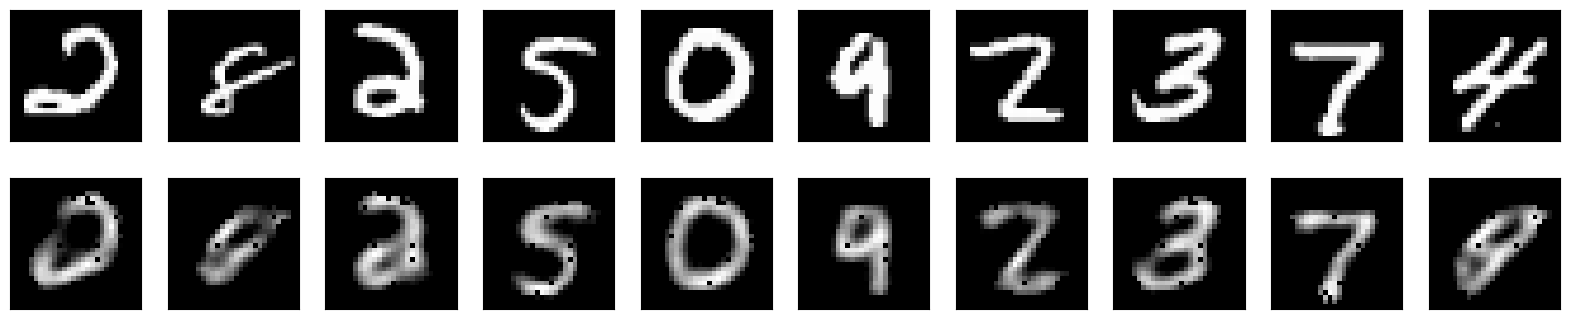

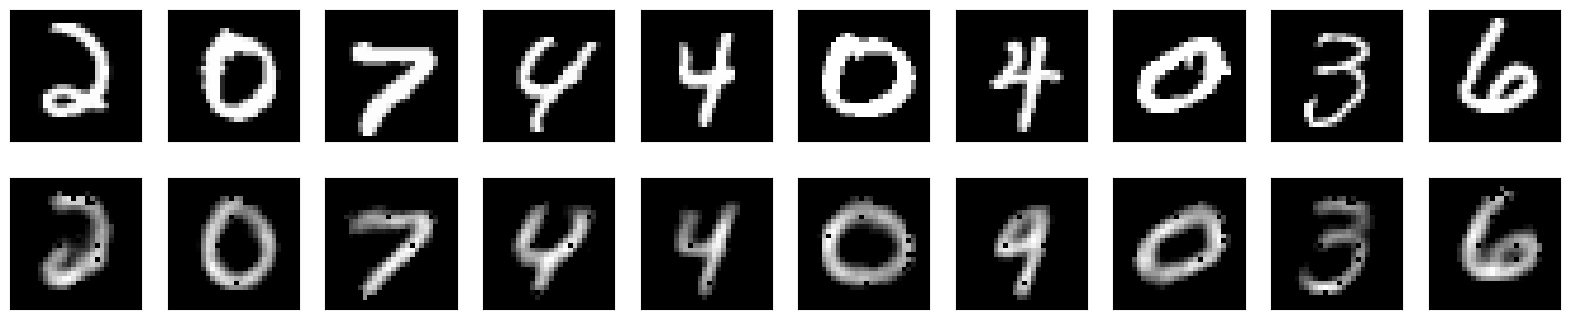

In [6]:
# Function to visualize the results
def display_images(orig, recon):
    # Randomly select 20 unique indices to display
    indices = np.random.choice(len(orig), 20, replace=False)

    for j in range(2):  # Two loops for two separate figures
        plt.figure(figsize=(20, 4))
        for i in range(10):  # Each figure displays 10 pairs of images
            index = indices[j * 10 + i]

            # Display original
            ax = plt.subplot(2, 10, i + 1)
            plt.imshow(orig[index].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            # Display reconstruction
            ax = plt.subplot(2, 10, i + 11)
            plt.imshow(recon[index].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()

# Show the original and reconstructed images
display_images(test_images, reconstructed_images)

**Plot accuracy and loss, with epochs:**

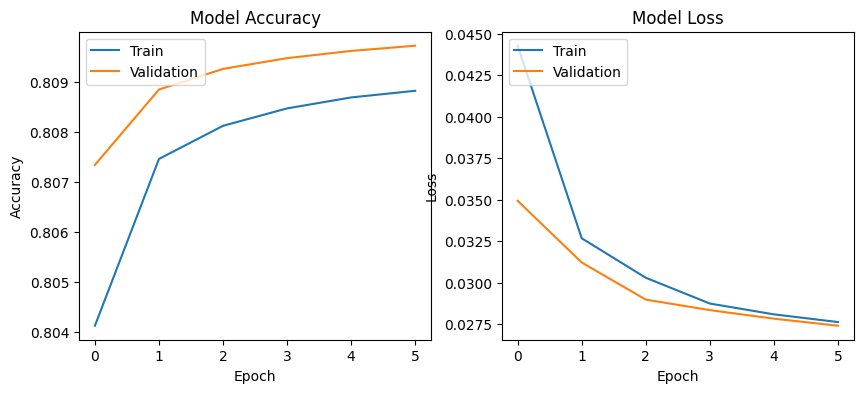

In [7]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_history(history)